C:\Users\pac computers\AppData\Local\Temp\ipykernel_16904\3474343641.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2000-01-01', periods=240, freq='M')


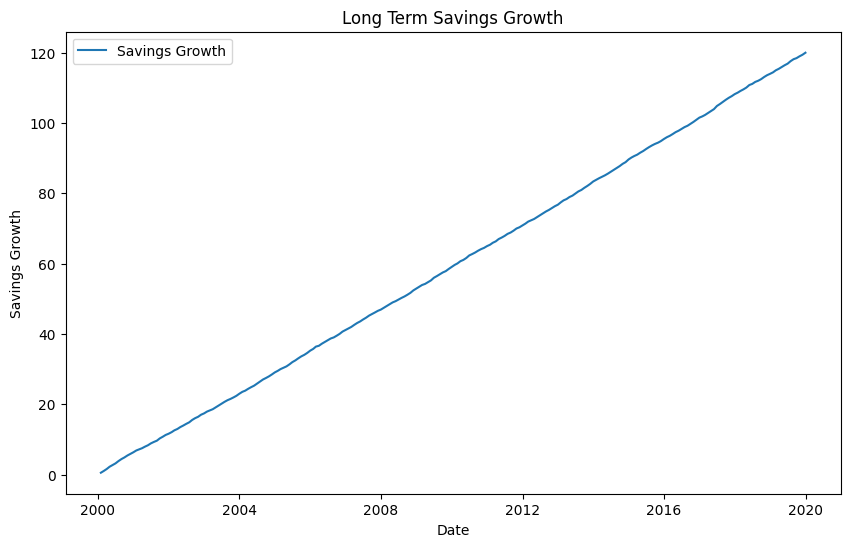

C:\Users\pac computers\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\pac computers\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\pac computers\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\pac computers\AppData\Local\Temp\ipykernel_16904\3474343641.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

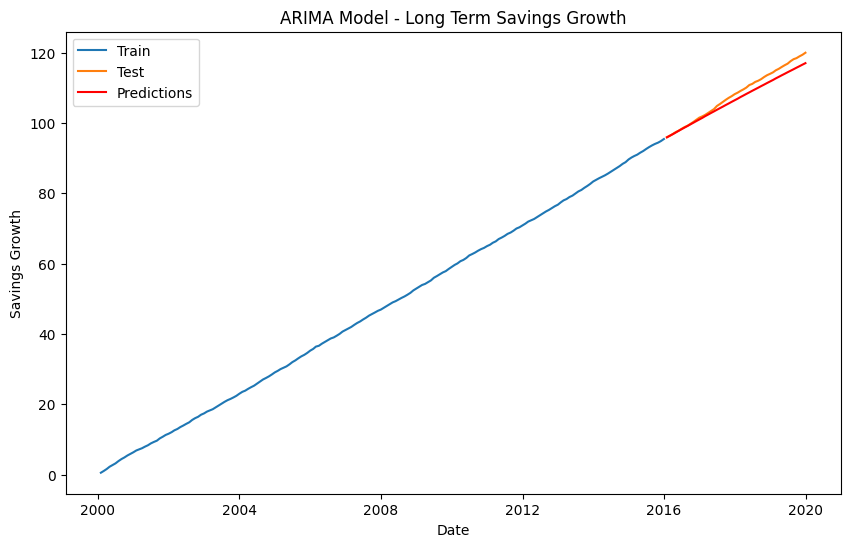

Mean Squared Error: 2.990454571736984


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Generate synthetic data for long term savings growth
np.random.seed(42)
date_range = pd.date_range(start='2000-01-01', periods=240, freq='M')
savings_growth = np.random.normal(loc=0.5, scale=0.1, size=len(date_range)).cumsum()

# Create a DataFrame
data = pd.DataFrame({'Date': date_range, 'SavingsGrowth': savings_growth})
data.set_index('Date', inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data, label='Savings Growth')
plt.title('Long Term Savings Growth')
plt.xlabel('Date')
plt.ylabel('Savings Growth')
plt.legend()
plt.show()

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))
test['Predictions'] = predictions

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test['SavingsGrowth'], label='Test')
plt.plot(test['Predictions'], label='Predictions', color='red')
plt.title('ARIMA Model - Long Term Savings Growth')
plt.xlabel('Date')
plt.ylabel('Savings Growth')
plt.legend()
plt.show()

# Calculate and print the mean squared error
mse = mean_squared_error(test['SavingsGrowth'], test['Predictions'])
print(f'Mean Squared Error: {mse}')


C:\Users\pac computers\AppData\Local\Temp\ipykernel_16904\2546588762.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2000-01-01', periods=240, freq='M')


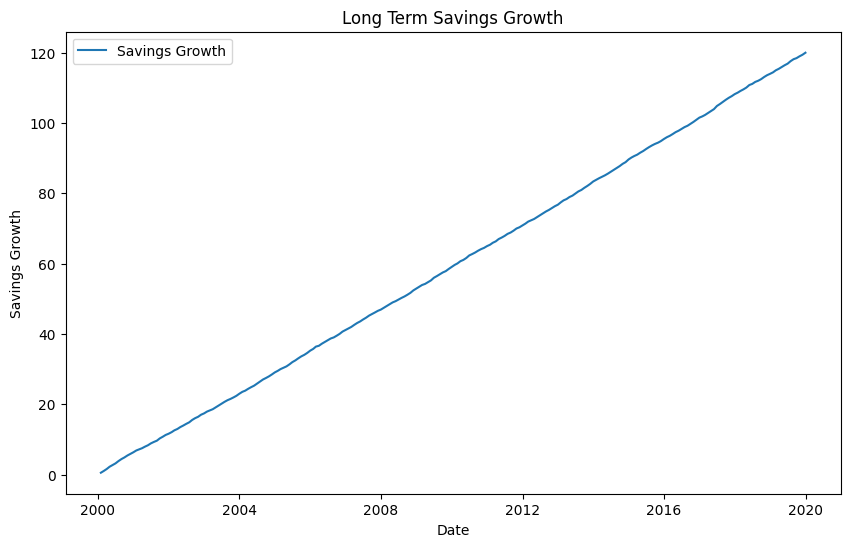

14:28:18 - cmdstanpy - INFO - Chain [1] start processing
14:28:18 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\pac computers\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\pac computers\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\pac computers\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of

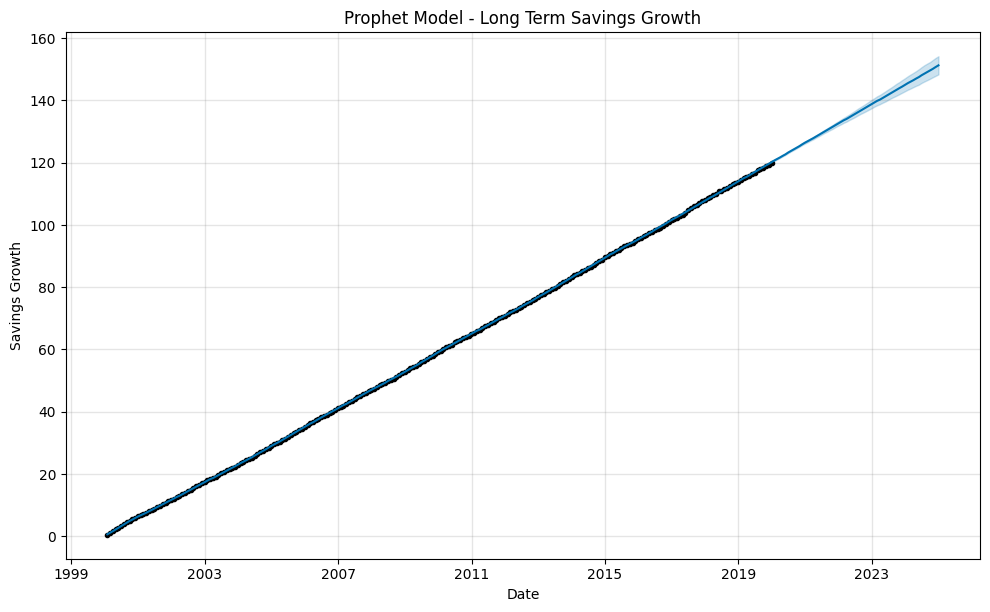

C:\Users\pac computers\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\pac computers\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\pac computers\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this w

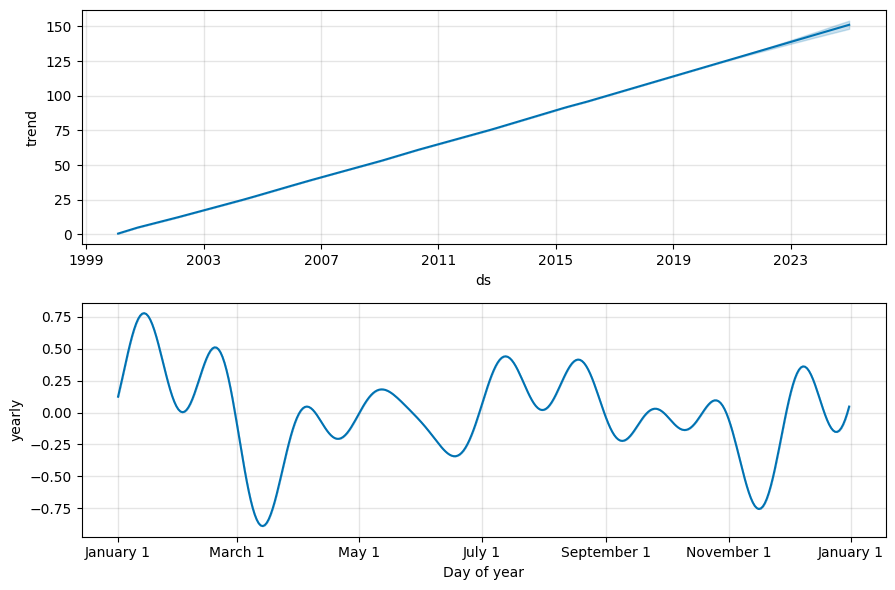

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Generate synthetic data for long term savings growth
np.random.seed(42)
date_range = pd.date_range(start='2000-01-01', periods=240, freq='M')
savings_growth = np.random.normal(loc=0.5, scale=0.1, size=len(date_range)).cumsum()

# Create a DataFrame
data = pd.DataFrame({'ds': date_range, 'y': savings_growth})

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data['y'], label='Savings Growth')
plt.title('Long Term Savings Growth')
plt.xlabel('Date')
plt.ylabel('Savings Growth')
plt.legend()
plt.show()

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=60, freq='M')
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Prophet Model - Long Term Savings Growth')
plt.xlabel('Date')
plt.ylabel('Savings Growth')
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()
